# Problem Statement
***We need to predict any movie box office collection using machine learning algorithm also we need to do proper feature engineering and selection also handle outliers and null values.***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datawrang as dw

In [2]:
df1 = pd.read_csv('bollywood_box_clean.csv')
df2 = pd.read_csv('movie_metadata.csv')

In [3]:
df1.head()

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"21 February, 2020",21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"21 February, 2020",21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",A couple is trapped on an abandoned ship lying...


In [4]:
df2.head() #This is our hollywood dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
print(df1.shape)
print(df2.shape)

(130, 17)
(5043, 28)


In [6]:
df2.country.value_counts()

USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64

In [7]:
df1.columns

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')

In [8]:
df1.drop(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total','movie_details','release_date'], axis = 1, inplace = True)

In [9]:
df1.head() #dropped columns

,movie_total_worldwide,movie_genre,movie_director,release_day,release_month,release_year,runtime,producer,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [10]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
df2.drop(['color', 'num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','movie_title', 'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews','content_rating', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],axis = 1, inplace = True) #dropping all other features.

In [13]:
df2.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,title_year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [14]:
df1.drop('producer', axis = 1 , inplace = True)

In [15]:
df1.head()

,movie_total_worldwide,movie_genre,movie_director,release_day,release_month,release_year,runtime,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [16]:
df2.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,title_year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [17]:
df2.rename(columns = {'director_name': 'Director','gross':'Boxoffice','title_year': 'year'}, inplace = True)

In [18]:
df1.rename(columns = {'movie_total_worldwide': 'Boxoffice','movie_genre': 'genres', 'runtime': 'duration'}, inplace = True)

In [19]:
df1.rename(columns = {'movie_director': 'Director','release_year': 'year'}, inplace = True)

In [20]:
df1.head()

,Boxoffice,genres,Director,release_day,release_month,year,duration,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [21]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,genres,actor_1_name,actor_3_name,language,country,year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [22]:
df2.genres.value_counts()

Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Crime|Drama|Mystery|Sci-Fi|Thriller             1
Adventure|Comedy|Crime|Drama                    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Comedy|Crime|Horror                             1
Name: genres, Length: 914, dtype: int64

In [23]:
# Lets create new features. For hollywood
genre1 = df2.genres.str.split('|').str[0]
genre2 = df2.genres.str.split('|').str[1]
genre3 = df2.genres.str.split('|').str[2]

In [24]:
print(f'genere1 :- \n {genre1}')
print(f'genere2 :- \n {genre2}')
print(f'genere3 :- \n {genre3}')

genere1 :- 
 0            Action
1            Action
2            Action
3            Action
4       Documentary
           ...     
5038         Comedy
5039          Crime
5040          Drama
5041         Comedy
5042    Documentary
Name: genres, Length: 5043, dtype: object
genere2 :- 
 0       Adventure
1       Adventure
2       Adventure
3        Thriller
4             NaN
          ...    
5038        Drama
5039        Drama
5040       Horror
5041        Drama
5042          NaN
Name: genres, Length: 5043, dtype: object
genere3 :- 
 0        Fantasy
1        Fantasy
2       Thriller
3            NaN
4            NaN
          ...   
5038         NaN
5039     Mystery
5040    Thriller
5041     Romance
5042         NaN
Name: genres, Length: 5043, dtype: object


In [25]:
df2['genere1'] = genre1
df2['genere2'] = genre2

In [26]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,genres,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


In [27]:
# Lets create new features. For Bollywood
genre1 = df1.genres.str.split(',').str[0]
genre2 = df1.genres.str.split(',').str[1]
genre3 = df1.genres.str.split(',').str[2]

In [28]:
df1['genere1'] = genre1
df1['genere2'] = genre2

In [29]:
# Lets create new features. For Hollywoood and Bollywood
actor_1_name= df1.actors.str.split(',').str[0]
actor_2_name = df1.actors.str.split(',').str[1]
actor_3_name = df1.actors.str.split(',').str[2]
df1['actor_1_name'] = actor_1_name
df1['actor_2_name'] = actor_2_name
df1['actor_3_name'] = actor_3_name

In [30]:
#dropping other unecessary features.
df1.drop(['genres','release_day','release_month','banner','actors'], axis = 1, inplace = True)
df2.drop(['genres'], axis = 1, inplace = True)


In [31]:
df1.head() 

,Boxoffice,Director,year,duration,genere1,genere2,actor_1_name,actor_2_name,actor_3_name
0,13.50,Homi Adajania,2020,145,Drama,Comedy,Irrfan Khan,Radhika Madan,Kareena Kapoor
1,137.00,Ahmed Khan,2020,147,Action,NaN,Tiger Shroff,Shraddha Kapoor,Riteish Deshmukh
2,44.50,Anubhav Sinha,2020,142,Drama,Social,Taapsee Pannu,Pavail Gulati,Dia Mirza
3,86.39,Hitesh Kewalya,2020,120,Comedy,Romance,Ayushman Khurana,Jitendra Kumar,Gajraj Rao
4,40.94,Bhanu Pratap Singh,2020,117,Horror,NaN,Vicky Kaushal,Bhumi Pednekar,Ashutosh Rana


In [32]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


# Lets create new features

In [33]:
df2.head() # As you can see we have features like country and language which are not present in our bollywood dataset we will add that

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


In [34]:
df1['country'] = 'IN'
df1['language'] = 'Hindi'

In [35]:
df1.head() #Bollywood Dataset

,Boxoffice,Director,year,duration,genere1,genere2,actor_1_name,actor_2_name,actor_3_name,country,language
0,13.50,Homi Adajania,2020,145,Drama,Comedy,Irrfan Khan,Radhika Madan,Kareena Kapoor,IN,Hindi
1,137.00,Ahmed Khan,2020,147,Action,NaN,Tiger Shroff,Shraddha Kapoor,Riteish Deshmukh,IN,Hindi
2,44.50,Anubhav Sinha,2020,142,Drama,Social,Taapsee Pannu,Pavail Gulati,Dia Mirza,IN,Hindi
3,86.39,Hitesh Kewalya,2020,120,Comedy,Romance,Ayushman Khurana,Jitendra Kumar,Gajraj Rao,IN,Hindi
4,40.94,Bhanu Pratap Singh,2020,117,Horror,NaN,Vicky Kaushal,Bhumi Pednekar,Ashutosh Rana,IN,Hindi


In [36]:
df2.head() #hollywood Dataset

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


## Day 2 

# LETS DO EDA

In [37]:
dfbolly = df1
dfholly = df2

In [38]:
dfholly['Boxoffice'] = dfholly['Boxoffice']/10000000 # to convert values into 10 million format or 1crore.

In [39]:
final_df = pd.concat([dfholly,dfbolly], ignore_index = True, axis = 0)

In [40]:
final_df['country'].value_counts()

USA              3807
UK                448
France            154
IN                130
Canada            126
                 ... 
Official site       1
Soviet Union        1
Chile               1
Peru                1
Panama              1
Name: country, Length: 66, dtype: int64

# Handle Missing Values

In [41]:
final_df.isnull().mean() #percentage of missing value 

Director        0.020104
duration        0.002900
actor_2_name    0.003480
Boxoffice       0.170887
actor_1_name    0.002126
actor_3_name    0.005799
language        0.002320
country         0.000967
year            0.020878
genere1         0.000193
genere2         0.134351
dtype: float64

<AxesSubplot:>

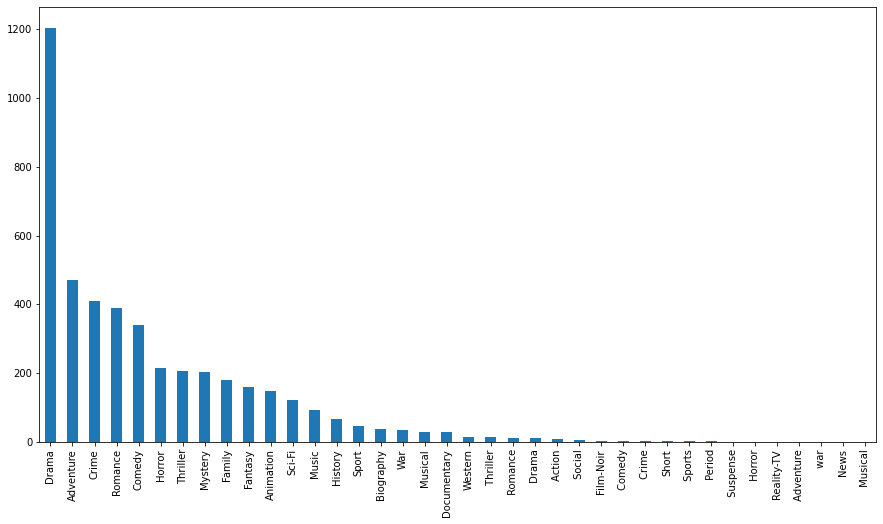

In [42]:
fig = plt.subplots(figsize=(15,8))
final_df['genere2'].value_counts().plot(kind = 'bar')

In [43]:
dw.Capture_NaN(dataframe = final_df, feature = 'genere2')
dw.Capture_NaN(dataframe = final_df, feature = 'genere1')

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0,0
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,Omung Kumar,135.0,Aditi Rao Hydari,15.680000,Sanjay Dutt,Sharad Kelkar,Hindi,IN,2017.0,Drama,NaN,1,0
5169,Apoorva Lakhia,124.0,Siddhanth Kapoor,9.000000,Shraddha Kapoor,Ankur Bhatia,Hindi,IN,2017.0,Biographical,Crime,0,0
5170,Ranjit Tiwari,147.0,Diana Penty,16.950000,Farhan Akhtar,Deepak Dobriyal,Hindi,IN,2017.0,Thriller,NaN,1,0
5171,Hansal Mehta,124.0,Sohum Shah,27.690000,Kangana Ranaut,Rupinder Nagra,Hindi,IN,2017.0,Drama,NaN,1,0


In [44]:
final_df

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0,0
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,Omung Kumar,135.0,Aditi Rao Hydari,15.680000,Sanjay Dutt,Sharad Kelkar,Hindi,IN,2017.0,Drama,NaN,1,0
5169,Apoorva Lakhia,124.0,Siddhanth Kapoor,9.000000,Shraddha Kapoor,Ankur Bhatia,Hindi,IN,2017.0,Biographical,Crime,0,0
5170,Ranjit Tiwari,147.0,Diana Penty,16.950000,Farhan Akhtar,Deepak Dobriyal,Hindi,IN,2017.0,Thriller,NaN,1,0
5171,Hansal Mehta,124.0,Sohum Shah,27.690000,Kangana Ranaut,Rupinder Nagra,Hindi,IN,2017.0,Drama,NaN,1,0


In [45]:
final_df['genere2'].fillna('Missing',inplace = True) # replacing All NaN values in genere2 with 'MISSING'

In [46]:
final_df.isnull().mean() #after removing null values

Director           0.020104
duration           0.002900
actor_2_name       0.003480
Boxoffice          0.170887
actor_1_name       0.002126
actor_3_name       0.005799
language           0.002320
country            0.000967
year               0.020878
genere1            0.000193
genere2            0.000000
genere2_Capture    0.000000
genere1_Capture    0.000000
dtype: float64

In [47]:
final_df.dropna(inplace = True)

In [48]:
final_df.isnull().sum()

Director           0
duration           0
actor_2_name       0
Boxoffice          0
actor_1_name       0
actor_3_name       0
language           0
country            0
year               0
genere1            0
genere2            0
genere2_Capture    0
genere1_Capture    0
dtype: int64

In [49]:
final_df.shape

(4260, 13)

In [50]:
final_df['year'].sort_values(ascending = False).unique()

array([2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012.,
       2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003.,
       2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994.,
       1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.,
       1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967.,
       1966., 1965., 1964., 1963., 1962., 1961., 1960., 1959., 1957.,
       1954., 1953., 1952., 1950., 1948., 1947., 1946., 1942., 1940.,
       1939., 1937., 1936., 1935., 1933., 1929., 1927.])

<AxesSubplot:>

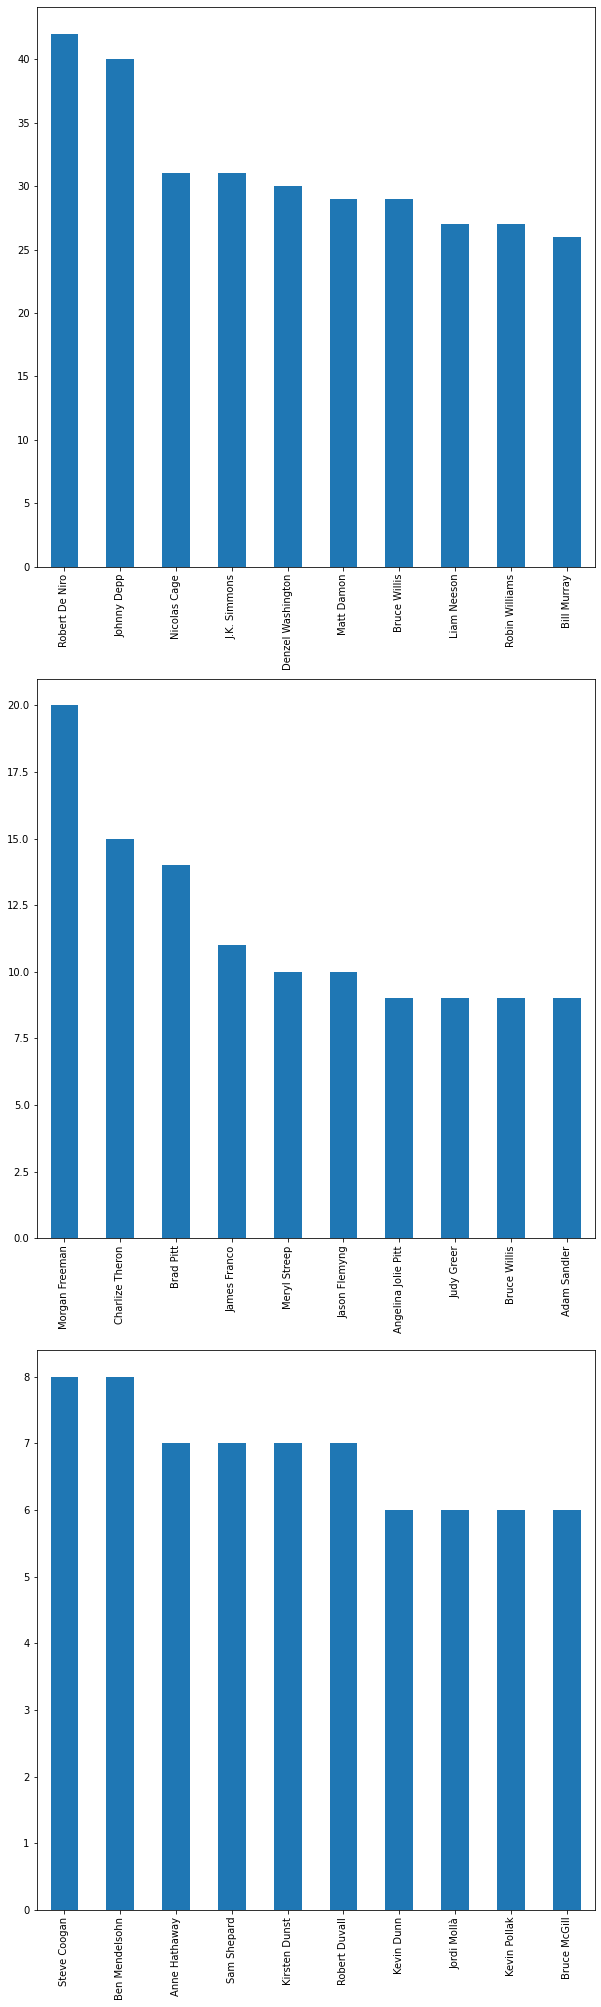

In [51]:
fig, ax = plt.subplots(3,1, figsize = (10,35))
#Value Counts
final_df['actor_1_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[0])
final_df['actor_2_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[1])
final_df['actor_3_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[2])


<AxesSubplot:>

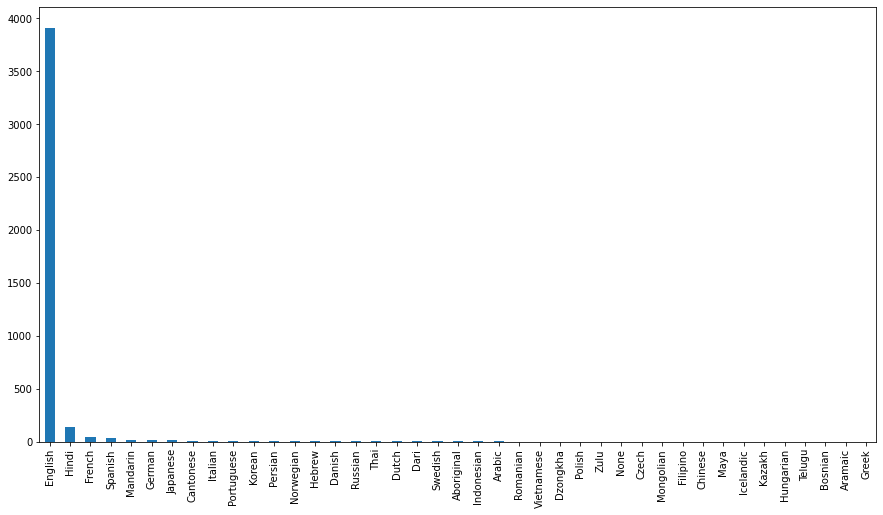

In [52]:
fig = plt.subplots(figsize = (15,8))
final_df['language'].value_counts().plot(kind = 'bar')

In [53]:
final_df.language.value_counts()

English       3913
Hindi          143
French          48
Spanish         30
Mandarin        18
German          15
Japanese        12
Cantonese       10
Italian          7
Portuguese       6
Korean           6
Persian          4
Norwegian        4
Hebrew           4
Danish           3
Russian          3
Thai             3
Dutch            3
Dari             2
Swedish          2
Aboriginal       2
Indonesian       2
Arabic           2
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Zulu             1
None             1
Czech            1
Mongolian        1
Filipino         1
Chinese          1
Maya             1
Icelandic        1
Kazakh           1
Hungarian        1
Telugu           1
Bosnian          1
Aramaic          1
Greek            1
Name: language, dtype: int64

In [54]:
final_df.head()

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0,0
5,Andrew Stanton,132.0,Samantha Morton,7.305868,Daryl Sabara,Polly Walker,English,USA,2012.0,Action,Adventure,0,0


<AxesSubplot:xlabel='genere1', ylabel='Boxoffice'>

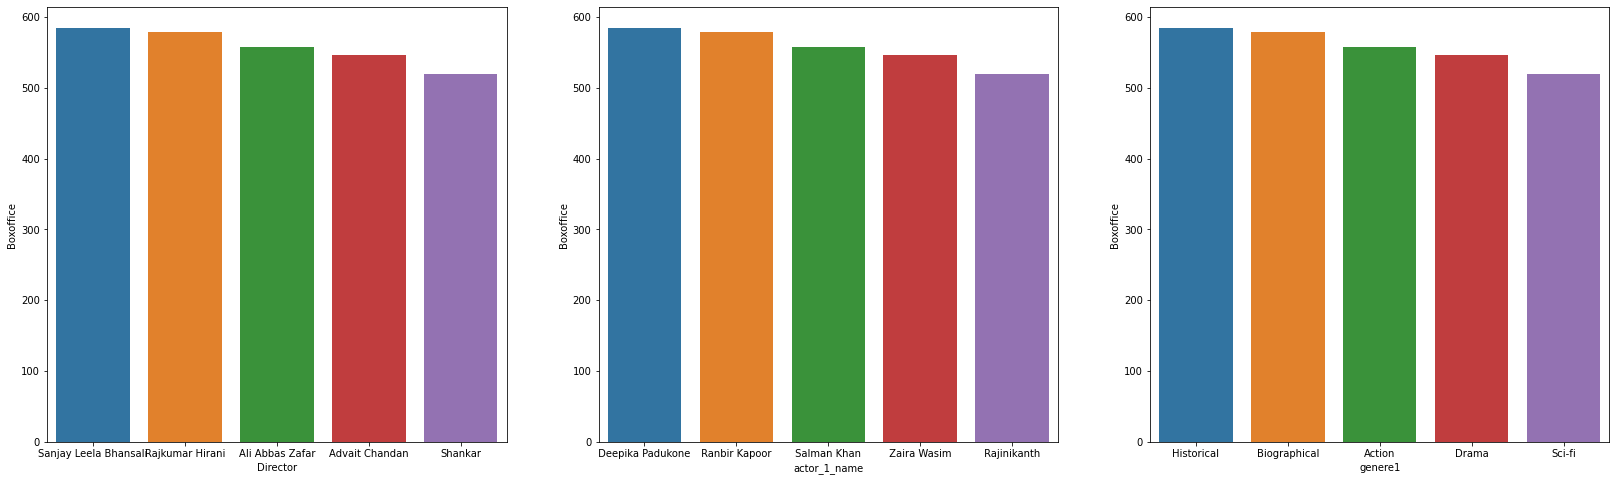

In [55]:
fig, ax = plt.subplots(1,3, figsize = (28,8))
sns.barplot(x = 'Director', y = 'Boxoffice', ax = ax[0], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])
sns.barplot(x = 'actor_1_name', y = 'Boxoffice', ax = ax[1], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])
sns.barplot(x = 'genere1', y = 'Boxoffice', ax = ax[2], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])

## Which Director Is getting more hits ?
1.Sanjay Leela Bhansali
## Which Genere is most famous.
1.Historical

### Which Actors Are Doing Most Amount Of Movies. ?

<AxesSubplot:>

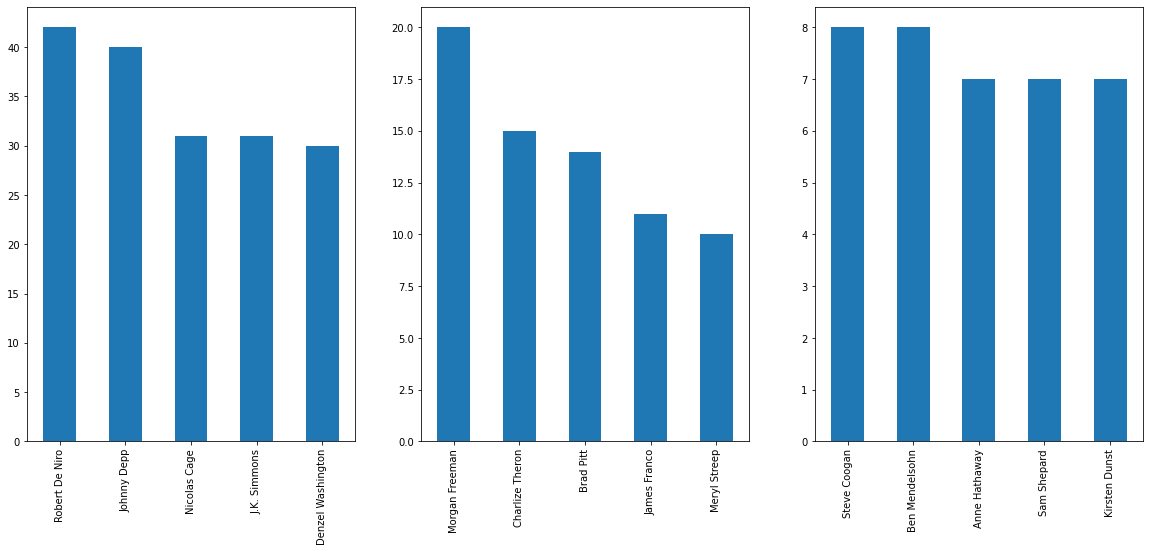

In [56]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
final_df['actor_1_name'].value_counts()[:5].plot(kind = 'bar', ax = ax[0]) # Top 5 Actors Who are doing most amount of movies
final_df['actor_2_name'].value_counts()[:5].plot(kind = 'bar',ax = ax[1]) # Top 5 Actors Who are doing most amount of movies
final_df['actor_3_name'].value_counts()[:5].plot(kind = 'bar',ax = ax[2]) # Top 5 Actors Who are doing most amount of movies


<AxesSubplot:ylabel='country'>

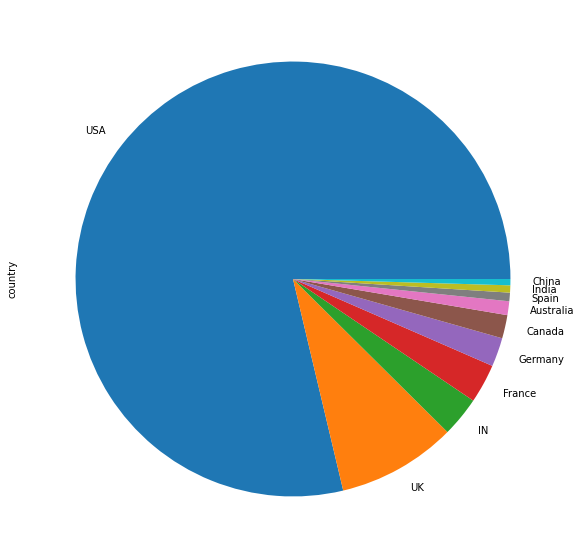

In [57]:
fig = plt.subplots(figsize = (15,10))
final_df.country.value_counts()[:10].plot(kind = 'pie')
# This is only for hollywood dataset. Because india data was also less and it was combined.

In [58]:
# We need to replace India With IN. and later on we will do label encoding in it.

In [59]:
final_df.country.replace({'India': 'IN'},regex=True,inplace = True) # Renaming India To IN
final_df.country.value_counts()

USA               3224
UK                 363
IN                 144
France             119
Germany             88
Canada              71
Australia           42
Spain               26
China               19
Japan               17
Hong Kong           15
Mexico              14
New Zealand         12
Italy               11
Ireland             10
South Korea         10
Denmark              9
Thailand             5
Brazil               5
Norway               4
Russia               4
Iran                 4
Argentina            3
Sweden               3
South Africa         3
Czech Republic       3
Israel               3
Netherlands          3
Poland               2
Iceland              2
Romania              2
Taiwan               2
Greece               2
Hungary              2
Belgium              2
Official site        1
West Germany         1
Georgia              1
Finland              1
Chile                1
Aruba                1
Colombia             1
Peru                 1
New Line   

# Top Countries

([<matplotlib.patches.Wedge at 0x262e51fd510>,
 [Text(-0.9263266011744141, 0.5932276358672597, 'USA'),
  Text(0.7262970596343657, -0.8261310919984036, 'UK'),
  Text(0.9927997711585301, -0.47365453063131413, 'IN'),
  Text(1.0696785928187988, -0.25649114617310714, 'France'),
  Text(1.0972904514217363, -0.07715999752904718, 'Germany')],
 [Text(-0.505269055186044, 0.3235787104730507, '82%'),
  Text(0.39616203252783583, -0.4506169592718564, '9%'),
  Text(0.5415271479046527, -0.2583570167079895, '4%'),
  Text(0.5834610506284357, -0.1399042615489675, '3%'),
  Text(0.5985220644118561, -0.04208727137948027, '2%')])

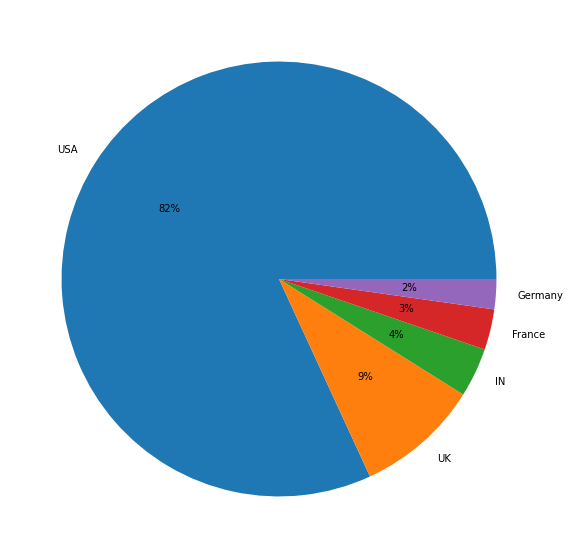

In [60]:
fig = plt.subplots(figsize = (15,10))
plt.pie(final_df['country'].value_counts()[:5],labels = final_df['country'].value_counts().index[:5], autopct='%1.0f%%')

In [61]:
final_df.dtypes

Director            object
duration           float64
actor_2_name        object
Boxoffice          float64
actor_1_name        object
actor_3_name        object
language            object
country             object
year               float64
genere1             object
genere2             object
genere2_Capture      int32
genere1_Capture      int32
dtype: object

In [62]:
dw.Find_Categorical_col(final_df) # it actually returns all real categorical features.

['duration',
 'year',
 'genere2_Capture',
 'genere1_Capture',
 'language',
 'country',
 'genere1',
 'genere2']

In [63]:
final_df.actor_3_name.value_counts()

Steve Coogan        8
Ben Mendelsohn      8
Anne Hathaway       7
Sam Shepard         7
Kirsten Dunst       7
                   ..
Caroline Goodall    1
DeVaughn Nixon      1
Clarke Peters       1
Ahney Her           1
 Shreyas Talpade    1
Name: actor_3_name, Length: 2967, dtype: int64

### TAKE TOP 10 VALUES BY COUNT AND THEN ONE HOT ENCODE THEM.
This technique was actually used in one of the kaggle competetion Orange Cup. 

In [64]:
final_df.actor_1_name.value_counts()[:10]

Robert De Niro       42
Johnny Depp          40
Nicolas Cage         31
J.K. Simmons         31
Denzel Washington    30
Matt Damon           29
Bruce Willis         29
Liam Neeson          27
Robin Williams       27
Bill Murray          26
Name: actor_1_name, dtype: int64

# Day 3

# Lets do encoding.

In [65]:
index_main = list(final_df.columns)
index_main.remove('Boxoffice')
X = final_df[index_main]
y = final_df['Boxoffice']

In [66]:
X.columns

Index(['Director', 'duration', 'actor_2_name', 'actor_1_name', 'actor_3_name',
       'language', 'country', 'year', 'genere1', 'genere2', 'genere2_Capture',
       'genere1_Capture'],
      dtype='object')

# Before doing any encoding its important to do train test split.

In [67]:
# Before doing any encoding its important to do train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# One hot encoding for multi category features.

In [68]:
X_train.drop(['actor_2_name','actor_3_name'], axis = 1, inplace = True)

In [69]:
print(f'{X_train.genere1.value_counts()}\n') # These are not that many and we can use label encoding.
print(X_train.genere2.value_counts()) # These are not that many and we can use label encoding.

Comedy          936
Action          799
Drama           646
Adventure       305
Crime           227
Biography       172
Horror          139
Documentary      44
Animation        40
Fantasy          36
Mystery          18
Thriller         10
Biographical      8
Sci-Fi            7
Romance           4
Western           4
Musical           4
Period            2
Historical        2
Sci-fi            1
Spy               1
Music             1
Family            1
Dance             1
Name: genere1, dtype: int64

Drama          812
Missing        413
Adventure      326
Romance        287
Crime          279
Comedy         246
Mystery        138
Thriller       124
Horror         123
Family         108
Animation      101
Fantasy        100
Sci-Fi          75
Music           61
History         45
Sport           38
Biography       27
Documentary     20
Musical         18
War             17
 Thriller       10
 Drama           8
Western          7
 Action          6
 Romance         5
 Social         

In [70]:
index_genere1 = list(X_train.genere1.unique())
index_genere2 = list(X_train.genere2.unique())

In [71]:
dicti = {} #ordering into dictionaries.
for i in range(len(index_genere1)):
    dicti[index_genere1[i]] = i 

In [72]:
dicti #This is for genere1

{'Crime': 0,
 'Horror': 1,
 'Adventure': 2,
 'Documentary': 3,
 'Comedy': 4,
 'Action': 5,
 'Musical': 6,
 'Drama': 7,
 'Fantasy': 8,
 'Biography': 9,
 'Romance': 10,
 'Animation': 11,
 'Sci-Fi': 12,
 'Thriller': 13,
 'Biographical': 14,
 'Western': 15,
 'Mystery': 16,
 'Sci-fi': 17,
 'Spy': 18,
 'Period': 19,
 'Historical': 20,
 'Music': 21,
 'Family': 22,
 'Dance': 23}

In [73]:
dict2 = {} #ordering into dictionaries.
for i in range(len(index_genere2)):
    dict2[index_genere2[i]] = i 

In [74]:
dict2

{'Drama': 0,
 'Mystery': 1,
 'Animation': 2,
 'War': 3,
 'Adventure': 4,
 ' Comedy': 5,
 'Missing': 6,
 'Comedy': 7,
 'Romance': 8,
 'Horror': 9,
 'Thriller': 10,
 'Sport': 11,
 'Documentary': 12,
 'Crime': 13,
 ' Thriller': 14,
 'Family': 15,
 'Fantasy': 16,
 'Sci-Fi': 17,
 'History': 18,
 'Music': 19,
 'Musical': 20,
 'Biography': 21,
 'Western': 22,
 ' Drama': 23,
 ' Period': 24,
 ' Romance': 25,
 ' Action': 26,
 ' Social': 27,
 ' Crime': 28,
 ' Horror': 29,
 ' Sports': 30,
 ' war': 31,
 ' Adventure': 32}

In [75]:
X_train['genere1'] = X_train.genere1.map(dicti)

In [76]:
X_train['genere2'] = X_train.genere2.map(dict2)

In [77]:
#using same technique we will encode our country language

In [78]:
X_train.dtypes

Director            object
duration           float64
actor_1_name        object
language            object
country             object
year               float64
genere1              int64
genere2              int64
genere2_Capture      int32
genere1_Capture      int32
dtype: object

In [79]:
index = X_train.language.unique()

In [80]:
dict3 = {} #ordering into dictionaries.
for i in range(len(index)):
    dict3[index[i]] = i 

In [81]:
dict3 #Languages mapping.

{'English': 0,
 'Hindi': 1,
 'French': 2,
 'Japanese': 3,
 'Norwegian': 4,
 'Thai': 5,
 'German': 6,
 'Persian': 7,
 'Spanish': 8,
 'Mandarin': 9,
 'Arabic': 10,
 'Cantonese': 11,
 'Mongolian': 12,
 'Dzongkha': 13,
 'Italian': 14,
 'Russian': 15,
 'Dutch': 16,
 'Czech': 17,
 'Greek': 18,
 'Hebrew': 19,
 'Indonesian': 20,
 'Swedish': 21,
 'Portuguese': 22,
 'Aramaic': 23,
 'Korean': 24,
 'Icelandic': 25,
 'None': 26,
 'Zulu': 27,
 'Kazakh': 28,
 'Telugu': 29,
 'Bosnian': 30,
 'Polish': 31,
 'Vietnamese': 32,
 'Danish': 33,
 'Dari': 34,
 'Hungarian': 35}

In [82]:
X_train['language'] = X_train.language.map(dict3)

In [83]:
X_test.head()

,Director,duration,actor_2_name,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
3548,Damian Nieman,101.0,Jason Cerbone,Glenn Plummer,Mark De Alessandro,English,USA,2003.0,Crime,Thriller,0,0
1988,Craig R. Baxley,88.0,Sam McMurray,Brian Bosworth,Richard Gant,English,USA,1991.0,Action,Crime,0,0
1875,Tate Taylor,146.0,Bryce Dallas Howard,Emma Stone,Mike Vogel,English,USA,2011.0,Drama,Missing,1,0
1722,Andrew Dominik,160.0,Jeremy Renner,Brad Pitt,Sam Shepard,English,USA,2007.0,Biography,Crime,0,0
3506,Tony Maylam,96.0,Alun Armstrong,Michael J. Pollard,Alastair Duncan,English,UK,1992.0,Action,Crime,0,0


In [84]:
# Again Ill be using One hot encoding KDD Cup Techniques.
X_train.Director.value_counts()

Steven Spielberg        18
Tim Burton              15
Clint Eastwood          14
Steven Soderbergh       14
Renny Harlin            14
                        ..
Simon Wells              1
Michael Patrick King     1
Alan Metter              1
Mike Mills               1
Vera Farmiga             1
Name: Director, Length: 1748, dtype: int64

In [85]:
index_dir = final_df.Director.unique()
dictdir = {} #ordering into dictionaries.
for i in range(len(index_dir)):
    dictdir[index_dir[i]] = i 
X_train['Director'] = X_train.Director.map(dictdir)

In [86]:
index = X_train.country.unique()
dict4 = {} #ordering into dictionaries.
for i in range(len(index)):
    dict4[index[i]] = i 

In [87]:
dict4

{'France': 0,
 'USA': 1,
 'Germany': 2,
 'IN': 3,
 'UK': 4,
 'Japan': 5,
 'Norway': 6,
 'Canada': 7,
 'Thailand': 8,
 'West Germany': 9,
 'Iran': 10,
 'Chile': 11,
 'Hong Kong': 12,
 'Spain': 13,
 'Taiwan': 14,
 'South Korea': 15,
 'Australia': 16,
 'South Africa': 17,
 'Mexico': 18,
 'Russia': 19,
 'China': 20,
 'Italy': 21,
 'Romania': 22,
 'Aruba': 23,
 'Denmark': 24,
 'Sweden': 25,
 'Netherlands': 26,
 'Ireland': 27,
 'Czech Republic': 28,
 'New Zealand': 29,
 'Finland': 30,
 'Greece': 31,
 'Argentina': 32,
 'Indonesia': 33,
 'Brazil': 34,
 'New Line': 35,
 'Israel': 36,
 'Iceland': 37,
 'Philippines': 38,
 'Georgia': 39,
 'Poland': 40,
 'Colombia': 41,
 'Official site': 42,
 'Hungary': 43,
 'Afghanistan': 44}

In [88]:
X_train['country'] = X_train.country.map(dict4)

In [89]:
index = final_df.actor_1_name.unique()
dictac = {} #ordering into dictionaries.
for i in range(len(index)):
    dictac[index[i]] = i 
X_train['actor_1_name'] = X_train.actor_1_name.map(dictac)

# My assumption of features.
The total no of inputs (i.e. samples) must be at least the square size of the number of features (i.e. n_samples > n_features ** 2 ). But still we can see the feature importance by using ExtraTreesRegressor.

In [90]:
# ### Feature importance
# from sklearn.ensemble import ExtraTreesRegressor
# model = ExtraTreesRegressor()
# model.fit(X_train,y_train)

In [91]:
# print(model.feature_importances_)

In [92]:
# #Plotting most important features.
# feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(20).plot(kind = 'barh')
# plt.show()

***When we examine the chart above, it’s clear that not even one dummy variable is featured in the top 20 which validates our hypothesis of variable selection for splitting. One-hot encoding has also obscured the order of importance of features that weren’t involved in the encoding and this makes the model inefficient if we use tree based algorithms.***

# Now We will do feature engineering for test dataset also.

In [93]:
X_test.drop(['actor_2_name','actor_3_name'], axis = 1, inplace = True)

index_genere1 = list(X_test.genere1.unique())
index_genere2 = list(X_test.genere2.unique())

dicti = {} #ordering into dictionaries.
for i in range(len(index_genere1)):
    dicti[index_genere1[i]] = i 

dict2 = {} #ordering into dictionaries.
for i in range(len(index_genere2)):
    dict2[index_genere2[i]] = i 

X_test['genere1'] = X_test.genere1.map(dicti)

X_test['genere2'] = X_test.genere2.map(dict2)



index = X_test.language.unique()

dict3 = {} #ordering into dictionaries.
for i in range(len(index)):
    dict3[index[i]] = i 
X_test['language'] = X_test.language.map(dict3)

#DIRECTOR
index_dir = final_df.Director.unique()
dictdir = {} #ordering into dictionaries.
for i in range(len(index_dir)):
    dictdir[index_dir[i]] = i 
X_test['Director'] = X_test.Director.map(dictdir)

#Actor dropped
index = X_test.country.unique()
dict4 = {} #ordering into dictionaries.
for i in range(len(index)):
    dict4[index[i]] = i 
X_test['country'] = X_test.country.map(dict4)
X_test.tail()

index = final_df.actor_1_name.unique()
dictac = {} #ordering into dictionaries.
for i in range(len(index)):
    dictac[index[i]] = i 
X_test['actor_1_name'] = X_test.actor_1_name.map(dictac)


In [94]:
df2 = X_train.merge(y_train, left_index=True,right_index = True)
df2

,Director,duration,actor_1_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture,Boxoffice
3430,1317,102.0,271,0,0,2003.0,0,0,0,0,1.010550
1247,492,98.0,20,0,1,2003.0,1,1,0,0,5.958807
7,6,100.0,6,0,1,2010.0,2,2,0,0,20.080726
4286,1545,102.0,1216,0,1,2007.0,3,3,0,0,0.143018
453,228,88.0,202,0,2,2008.0,4,0,0,0,12.013605
...,...,...,...,...,...,...,...,...,...,...,...
3831,1021,90.0,329,0,24,2013.0,0,0,0,0,0.077856
482,177,114.0,220,0,1,1998.0,5,4,0,0,5.062801
3375,1308,142.0,1135,0,4,1969.0,5,4,0,0,2.280000
4364,1660,109.0,1399,0,1,2011.0,7,6,1,0,0.084121


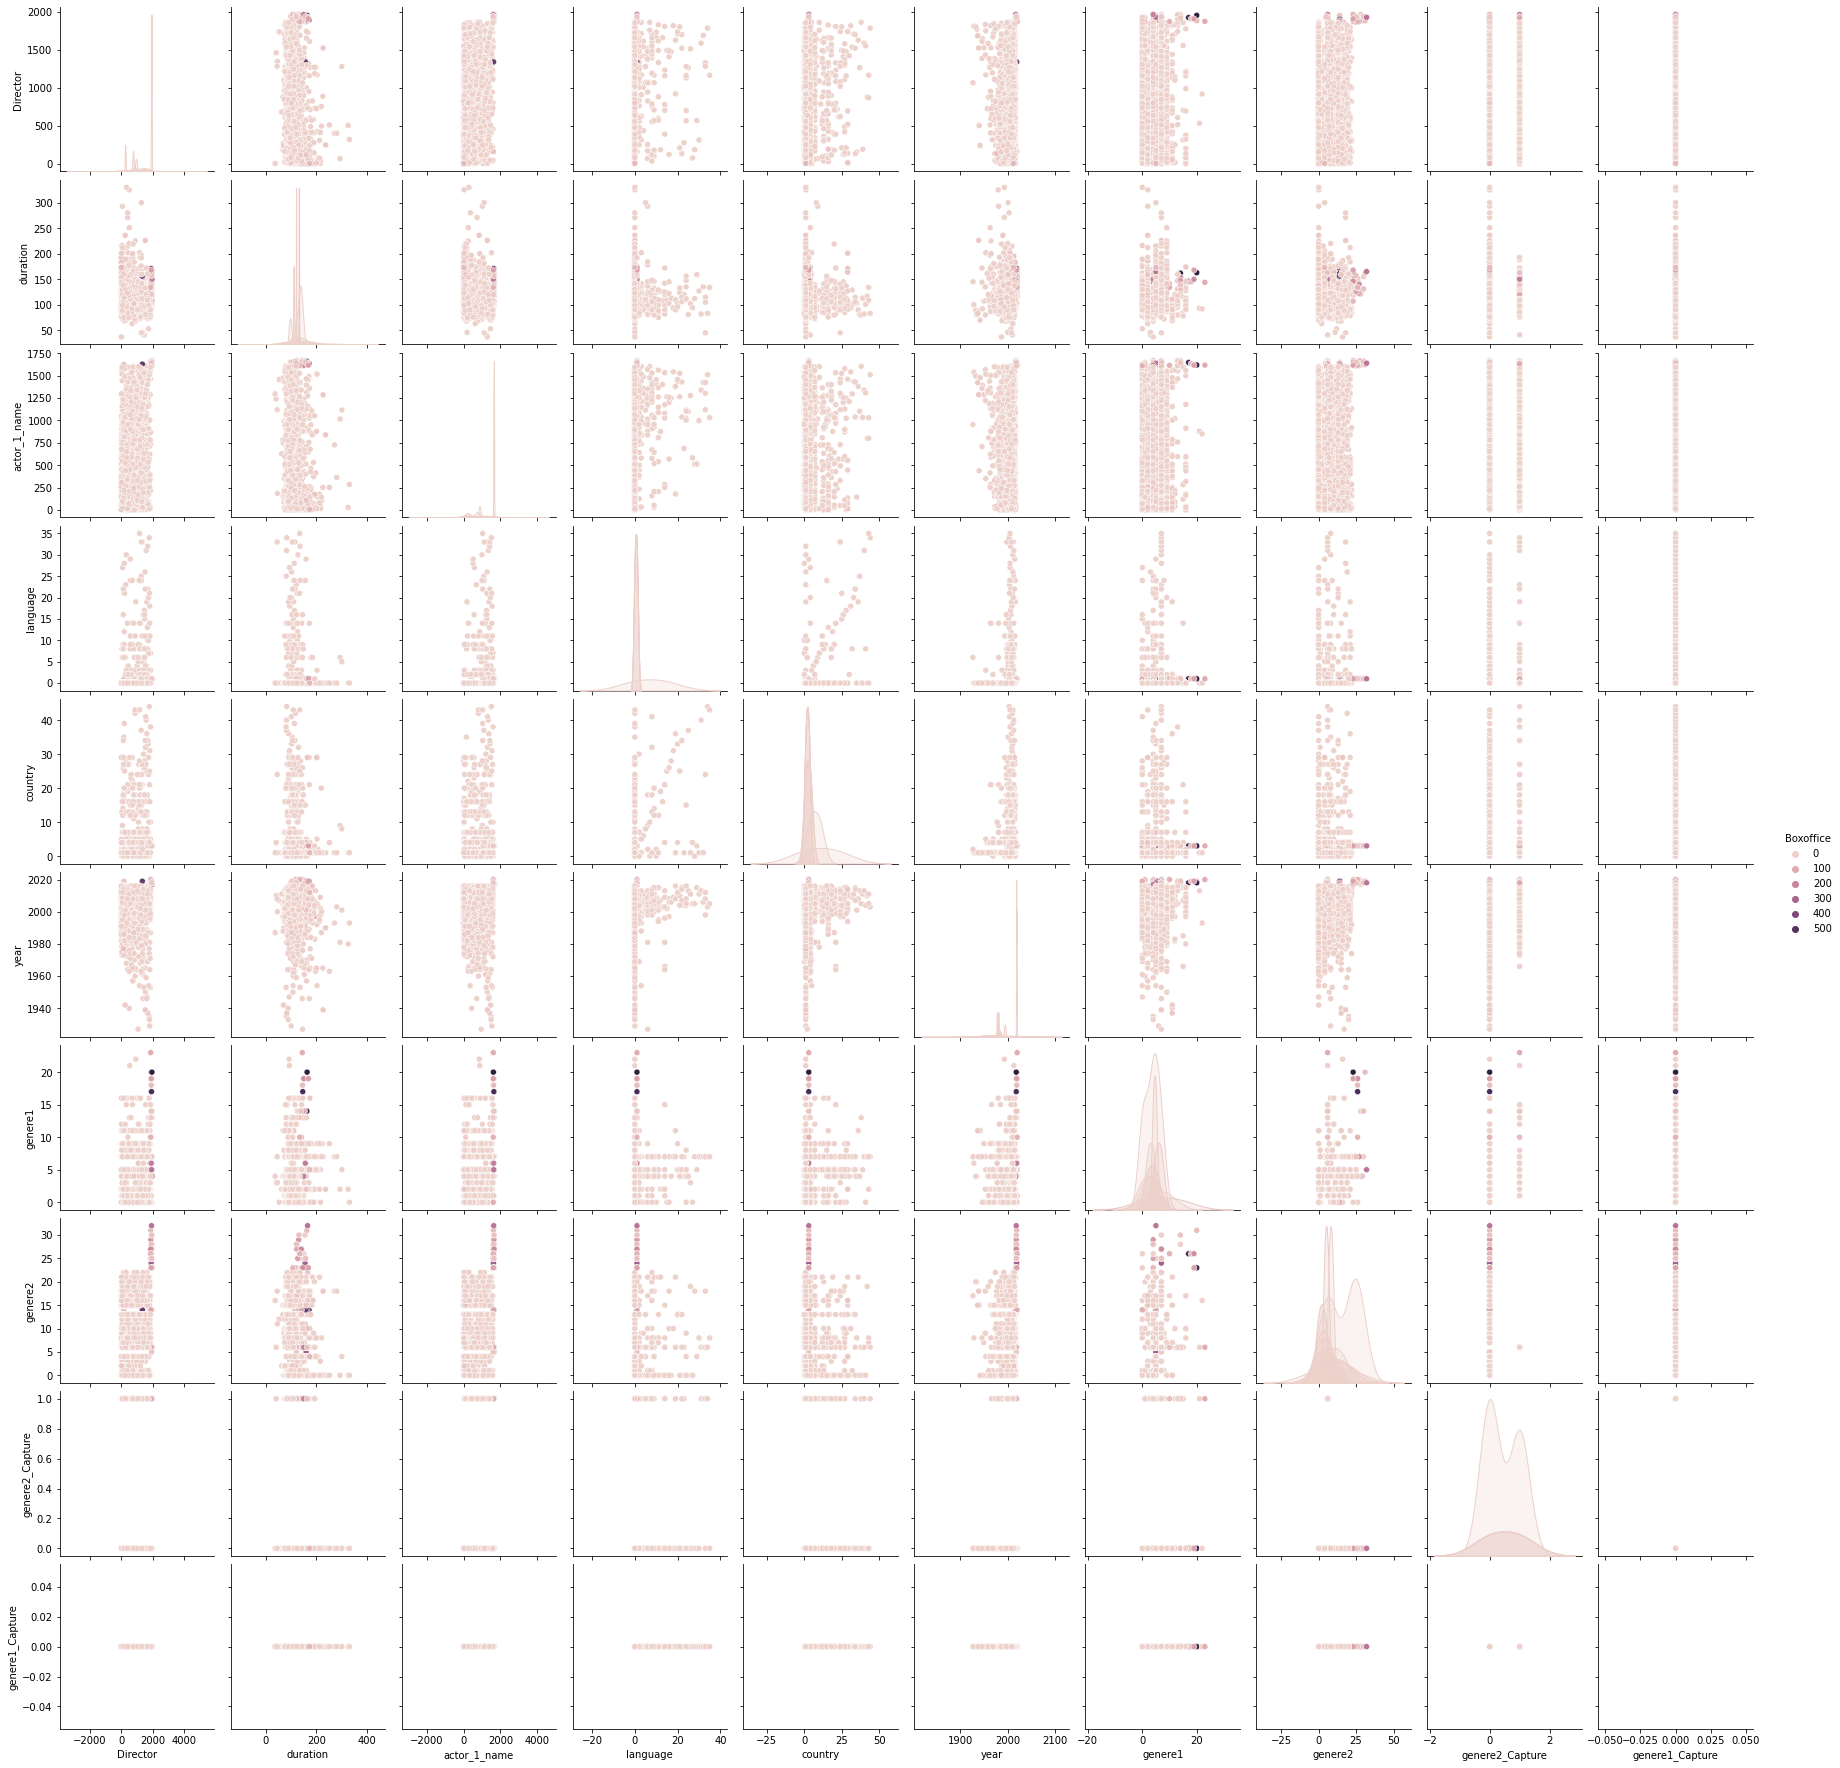

In [95]:
sns.pairplot(df2,hue = 'Boxoffice')

In [96]:
x_t = X_train
x_te = X_test


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
index = x_t.columns
scaleddata = scaler.fit_transform(x_t)


In [98]:
newdf = pd.DataFrame(scaleddata, columns = index)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
index = x_te.columns
test_scaleddata = scaler.fit_transform(x_te)
newdf2 = pd.DataFrame(test_scaleddata, columns = index)

In [100]:
X_train = newdf
X_test = newdf2

### Because our feature importance is showing that it is not usefull to use features like actor after one hot encoding and only director has some importance that too very minimal.
Only genere year country language duration is more important we will only use these features.

In [101]:
X_train.drop(['year','genere2'], axis = 1, inplace = True) 
X_test.drop(['year','genere2'], axis = 1, inplace = True)

In [102]:
X_train

,Director,duration,actor_1_name,language,country,genere1,genere2_Capture,genere1_Capture
0,1.128038,-0.360174,-0.487627,-0.178435,-0.523035,-1.768032,-0.371344,0.0
1,-0.359858,-0.537279,-1.007224,-0.178435,-0.308431,-1.399164,-0.371344,0.0
2,-1.236364,-0.448726,-1.036206,-0.178435,-0.308431,-1.030297,-0.371344,0.0
3,1.539239,-0.360174,1.468626,-0.178435,-0.308431,-0.661429,-0.371344,0.0
4,-0.835985,-0.980042,-0.630464,-0.178435,-0.093826,-0.292561,-0.371344,0.0
...,...,...,...,...,...,...,...,...
3403,0.594199,-0.891490,-0.367560,-0.178435,4.627465,-1.768032,-0.371344,0.0
3404,-0.927964,0.171142,-0.593202,-0.178435,-0.308431,0.076306,-0.371344,0.0
3405,1.111807,1.410879,1.300948,-0.178435,0.335382,0.076306,-0.371344,0.0
3406,1.746643,-0.050240,1.847456,-0.178435,-0.308431,0.814042,2.692920,0.0


In [103]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X_train,y_train)

DecisionTreeRegressor()

In [104]:
pred = regr.predict(X_test)

In [105]:
regr.score(X_train, y_train)

0.9999695391903802

In [106]:
regr.score(X_test,y_test)

-0.20613624422095067

In [107]:
from sklearn import metrics
metrics.r2_score(y_test, pred)

-0.20613624422095067

In [108]:
# Randomized Search CV 
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [109]:
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [110]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 10, verbose=2, random_state=0, n_jobs = 1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=100; total time=   0.0s
[CV] END m

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=2; total time=   0.0s

[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=100; total time=   0.0s

[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10; total time=

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5; total time= 

[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100; t

[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10;

[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=15; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=15; total tim

[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV]

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [111]:
prediction = rf_random.predict(X_test)

In [112]:
rf_random.best_params_

{'min_samples_split': 100, 'min_samples_leaf': 5, 'max_depth': 5}

In [113]:
from sklearn import metrics
metrics.r2_score(y_test, prediction)

0.28373840749348245